<h3>Midterms Project

Coded and submitted by:<br>
<i>Zarraga, Sebastian Cale M.<br>
    201913764 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

- What are Bebang's monthly revenues, costs, and profits?

- How much profit did Bebang get for each flavor? And which are the top 3 and bottom 3 flavors?

- Is there anything Bebang could improve on marketing or advertising? Bebang know there are big dips in the sales so she want to know what she could do.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [4]:
import pandas as pd # It import the library of pandas

file_prices = "bebang prices.csv" # It collect the prices of bebang's donut
file_sales = "bebang sales.csv" # It collect the sales of bebang's donut

df_prices = pd.read_csv(file_prices, index_col=0) # It read the data file of the prices 
df_sales = pd.read_csv(file_sales) # It read the data file of the sales

## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [5]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [6]:
import numpy as np # It import the library of Numpy
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor')) # It get the index of flavors in df_sales 
prices_mat = np.array(df_prices)[0].reshape(12,1) # The vector was been reshaped to (12,1)
costs_mat = np.array(df_prices)[1].reshape(12,1) # The vector was been reshaped to (12,1)

## Do not alter these lines
print(sales_mat.shape) # It print the shape of sales_mat
print(prices_mat.shape) # It print the shape of prices_mat
print(costs_mat.shape) # It print the shape of costs_mat
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [7]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales): # Function of the monthly sales
    monthly_revenue = (sales*price).sum(axis=0) # It calculate the monthly revenue and find the sum of each month 
    monthly_costs = (sales*cost).sum(axis=0) # It calculate the monthly costs and find the sum of each month 
    monthly_profits = monthly_revenue - monthly_costs # It calculate the monthly profit by subtracting  
                                                      # the monthly revenue and the monthly costs
    # It returns the value of month_rev, month_cost, month_profit 
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [8]:
# It provide the value for the given function
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)

# List of months
months = ['January','February','March','April',
          'May','June','July','August','September',
          'October','November','December']

# It gather all of the values of the month_rev, month_cost, and month_profit 
monthly_value = {'Monthly Revenue':month_rev,'Monthly Costs':month_cost,'Monthly Profit':month_profit}

# Using the DataFrame of pandas the index parameter assigns an index to each row.
monthly_report = pd.DataFrame(monthly_value, index = months)

print(monthly_report) # print the values

           Monthly Revenue  Monthly Costs  Monthly Profit
January             236825         157454           79371
February            175530         116322           59208
March               159045         105195           53850
April                30335          20334           10001
May                 150085          97261           52824
June                 16735          11208            5527
July                 17970          12372            5598
August               16995          11497            5498
September            14960           9926            5034
October              21590          14377            7213
November            213655         137107           76548
December            347365         230209          117156


## Part 2: Flavor Sales

In [9]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales): # Function of the flavor sales
    flavor_revenue =  (sales*price).sum(axis=1) # It calculate the flavors revenue and find the sum of each flavor
    flavor_costs = (sales*cost).sum(axis=1) # It calculate the flavors costs and find the sum of each flavor
    flavor_profits = flavor_revenue - flavor_costs # It calculate the flavors profit by subtracting  
                                                   # the flavors revenue and the flavors costs  
    return flavor_profits.flatten( )# It returns the value of flavors profit

In [10]:
# It provide the value for the given function
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)

# List of numbers
num = ['1.','2.','3.','4.',
       '5.','6.','7.','8.',
       '9.','10.','11.','12.']

# It gather all of the flavors and the values of the flavors profit 
flavor_value = {'Flavors' :['Red velvet','Oreo','Sugar glazed','Almond honey','Matcha',
                           'Strawberry cream','Brown sugar boba','Fruits and nuts',
                           'Dark chocolate', 'Chocolate and orange','Choco mint',
                           'Choco butter naught'],
                'Profit for the whole year' :flavor_profit}

# Using the DataFrame of pandas the index parameter assigns an index to each row.
flavor_report = pd.DataFrame(flavor_value, index = num)

print(flavor_report) # print the values

                  Flavors  Profit for the whole year
1.             Red velvet                      41370
2.                   Oreo                      19040
3.           Sugar glazed                      53260
4.           Almond honey                      23715
5.                 Matcha                      61245
6.       Strawberry cream                      18387
7.       Brown sugar boba                      30660
8.        Fruits and nuts                      39820
9.         Dark chocolate                      44790
10.  Chocolate and orange                      27615
11.            Choco mint                      26156
12.   Choco butter naught                      91770


In [15]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
best_3_flavors = np.sort(flavor_profit)[::-1] # It sort the values and reverse it to highest to lowest
worst_3_flavors = np.sort(flavor_profit) # It sort the values to lowest to highest

# list of ranks
rank = ['Rank 1','Rank 2','Rank 3']

# It gather all of the top 3 best and least selling flavor with their value
best_and_worst_selling_flavor = {'Best selling flavors' :['Choco butter naught:','Matcha:','Sugar glazed:'],
                                 'Profit':[best_3_flavors[0],best_3_flavors[1],best_3_flavors[2]],
                                 'Least selling flavors' :['Strawberry cream:','Oreo:','Almond honey:'],
                                 'profit':[worst_3_flavors[0],worst_3_flavors[1],worst_3_flavors[2]]}

# Using the DataFrame of pandas the index parameter assigns an index to each row.
best_and_worst_selling_report = pd.DataFrame(best_and_worst_selling_flavor, index = rank)

print(best_and_worst_selling_report) # print the values

        Best selling flavors  Profit Least selling flavors  profit
Rank 1  Choco butter naught:   91770     Strawberry cream:   18387
Rank 2               Matcha:   61245                 Oreo:   19040
Rank 3         Sugar glazed:   53260         Almond honey:   23715


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [8]:
# It import the library of matplotlib and seaborn to visualize the data
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

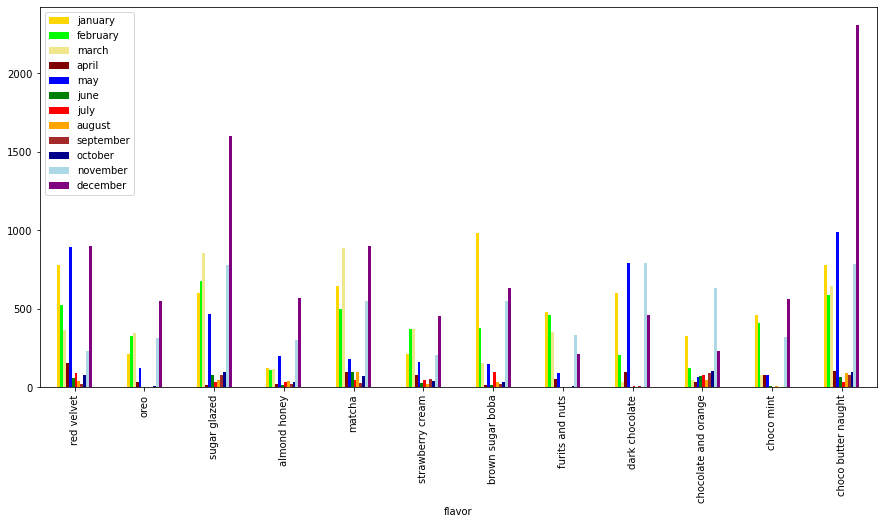

In [105]:
# List of colors
colors = ['gold','lime','khaki','maroon',
          'blue','green','red','orange','brown',
          'darkblue','lightblue','purple']

# It plot the sales of the flavors each month based on the given value in bebang's data
df_sales.plot(x='flavor',kind='bar',figsize=(15,7), color = colors) 

#### Monthly Sales

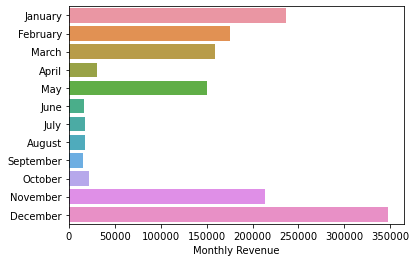

In [89]:
# Using seabron barplot it display the rating of the revenue each month 
# The x-axis present the value of monthly revenue and for the y-axis is the months
sns.barplot(x = "Monthly Revenue", y = months, data = monthly_report)
plt.show()

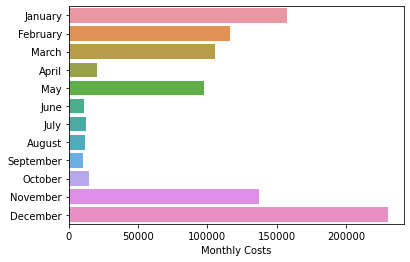

In [106]:
# Using seabron barplot it display the rating of the costs each month
# The x-axis present the value of monthly costs and for the y-axis is the months
sns.barplot(x = "Monthly Costs", y = months , data = monthly_report)
plt.show()

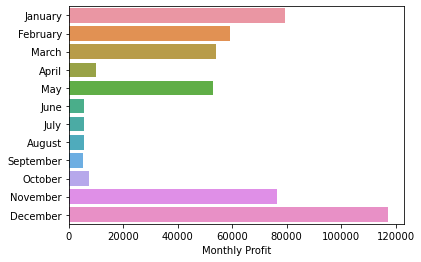

In [91]:
# Using seabron barplot it display the rating of the profit each month
# The x-axis present the value of monthly profit and for the y-axis is the months
sns.barplot(x = 'Monthly Profit', y = months , data = monthly_report)
plt.show()

#### Flavor Sales

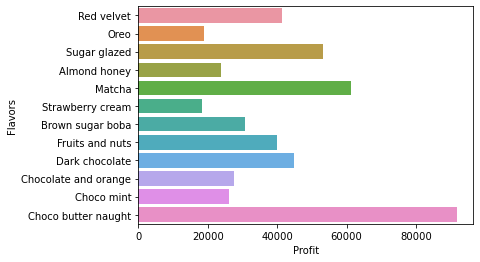

In [71]:
# Using seabron barplot it display the rating of the profit each flavor of the donut
# The x-axis present the value of flavors profit and for the y-axis is the flavors
sns.barplot(x = 'Profit', y = 'Flavors' , data = flavor_report)
plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

Good Day Ms. Bebang, thank you for relying on me again for the data analysis of your business. As you could see in the data visualization of the Entire Dataset most of the flavors of the donut has a higher rating when it’s the month of December and it has a lower rating when it’s the month of June until October, the rest of the months have the average rating each flavor of the donut. Next is the data visualization of the monthly sales it shows that the monthly revenue, costs, and profit that the business get have a high rating when it’s the month of December, and the lowest rating is the month of June until October. We could see that most of the highest rating in months is always December it’s because most people like to eat dessert especially donuts for the Christmas celebration and the lowest rating of the month starts from June until October because people rarely buy a donut. The final data visualization is flavor sales it shows that the highest rating of the flavor donut is the choco butter naught and the lowest rating flavor donut is the strawberry cream. In the data of the most selling flavors of the donut is the choco butter naught, matcha, and sugar-glazed for the few selling flavors of the donut is the strawberry cream, oreo, and almond honey.

The things that I could recommend for the improvement of the business is to have a survey to the customers and have a rating what are their favorite flavors of the donuts that they buy and what are the flavors of the donuts that they rarely buy also ask them if they want to add a new flavor of the donut so that the business can replace the other flavors that have a lower rating. The business can also add a brewed coffee because it’s the best combination and most people like to have a coffee while eating a donut. If the business wants to earn more they could build other branches like near a police station, call center office, and other places where people like to eat a donut.